Este notebook de ipython contiene diversos tipos de elementos (código, imágenes, videos, html, etc.) 
para poder indicar el modo de uso y ver cómo se transforman utilizando el "plugin" para jekyll.

## 1 - Código Markdown con diversidad de tags
Con *italicas* y **negritas**, y listas
 * Uno
 * Dos
 * Tres

## 2 - Código Markdown con mathjax
Variables en latex $\alpha$ y $\beta$. 

También se pueden insertar fórmulas
$$
F(b)-F(a) = \int_{a}^{b} f(x)\, dx \approx \sum_{k=1}^{N} \Delta x f(x_{k})
$$

## 3 - Código de python

In [1]:
# Sin output
a = 2
b = 3.14
c = "string"
d = True
e = [1,2,3]
f = {"vaca":"cow", "perro":"dog"}

In [2]:
# Con output correcto
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)

2
3.14
string
True
[1, 2, 3]
{'vaca': 'cow', 'perro': 'dog'}


## 4 - Audio importado
Trabajar con sonidos es sencillo. Simplemente se importa la clase Audio.

In [3]:
from IPython.display import Audio
Audio(url="http://www.nch.com.au/acm/8k16bitpcm.wav")

## 5 - Video importado
Para mostrar videos de youtube, es posible utilizar la clase respectiva.

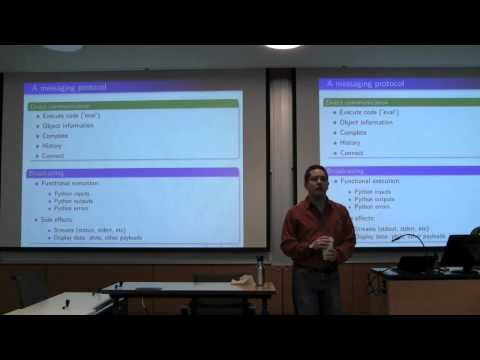

In [4]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('1j_HxD4iLn8')

## 6 - HTML desde código

Es posible utilizar la clase `HTML` para mostrar cualquier tipo de HTML.

In [5]:
from IPython.display import HTML
s = """<table>
<tr>
<th>Fecha</th>
<th>Temperatura [°C]</th>
<th>Humedad [%]</th>
</tr>
<tr>
<td>Ayer</td>
<td>12</td>
<td>32</td>
</tr>
<tr>
<td>Hoy</td>
<td>20</td>
<td>20</td>
</tr>
<tr>
<td>Mañana</td>
<td>26</td>
<td>11</td>
</tr>
</table>"""
HTML(s)

Fecha,Temperatura [°C],Humedad [%]
Ayer,12,32
Hoy,20,20
Mañana,26,11


## 7 - Pandas

También podemos utilizar pandas sin demasiado problema.

In [6]:
import pandas
df = pandas.DataFrame({'impar' : [1., 3., 5.], 'par' : [2., 5., 7.]}, index=['a', 'b', 'c'])
print(df)

   impar  par
a    1.0  2.0
b    3.0  5.0
c    5.0  7.0


Y podemos utilizar la versión HTML

In [7]:
df

,impar,par
a,1.0,2.0
b,3.0,5.0
c,5.0,7.0


## 8- Sitios externos
Podemos incluir sitios externos.

In [8]:
from IPython.display import IFrame
IFrame('http://www.wikipedia.org/', width='100%', height=300)

## 9 - Error
Los errores se indican también en ipython.

In [9]:
# Con output de error
print(unknown_variable)

NameError: name 'unknown_variable' is not defined

## 10- Grafico Altair
Ejemplo de visualizacion en Altair.

In [11]:
import altair as alt
import pandas as pd
import numpy as np

np.random.seed(42)
data = pd.DataFrame(np.cumsum(np.random.randn(100, 3), 0).round(2),
                    columns=['A', 'B', 'C'], index=pd.RangeIndex(100, name='x'))
data = data.reset_index().melt('x', var_name='category', value_name='y')

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

# The basic line
line = alt.Chart().mark_line(interpolate='basis').encode(
    x='x:Q',
    y='y:Q',
    color='category:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='x:Q',
    opacity=alt.value(0),
).properties(
    selection=nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'y:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='x:Q',
).transform_filter(
    nearest.ref()
)

# Put the five layers into a chart and bind the data
chart = alt.layer(line, selectors, points, rules, text,
                  data=data, width=600, height=300)
chart.interactive()

<VegaLite 2 object>